In [43]:
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from scipy.special import softmax
from plotting import *
from sklearn.decomposition import PCA
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
src = "../data/train-images-idx3-ubyte.gz"
with gzip.open(src, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
X = data.reshape(data.shape[0], 28*28).astype(np.float64)[:100]
X = (X - np.min(X)) / (np.max(X) - np.min(X))
first_ten_idx = [1,3,5,7,9,0,13,15,17,4]

In [45]:
pca = PCA(n_components=68)
X_pca = pca.fit_transform(X)

In [46]:
data_pca = X_pca[first_ten_idx].T
print(data_pca.shape)

(68, 10)


In [47]:
fbp = open('../mnist6_bptt','rb')
dbp = pickle.load(fbp)
fbp.close()

flc = open('../mnist6_local','rb')
dlc = pickle.load(flc)
flc.close()

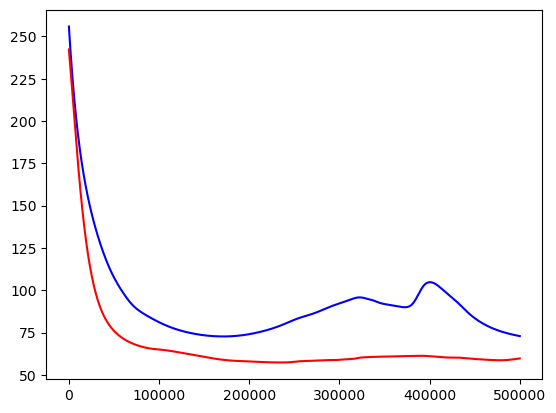

In [48]:
plt.plot(dbp['loss_list'],color='b')
plt.plot(dlc['loss_list'],color='r')
#plt.yscale('log')
plt.show()

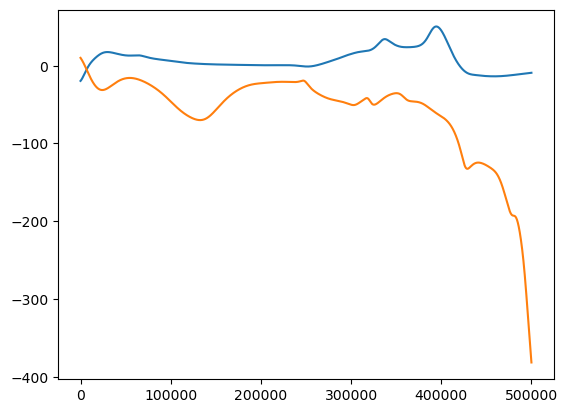

In [49]:
i=0
plt.plot(dbp['grad_list'][i])
plt.plot(dlc['grad_list'][i])
#plt.yscale('log')
plt.show()

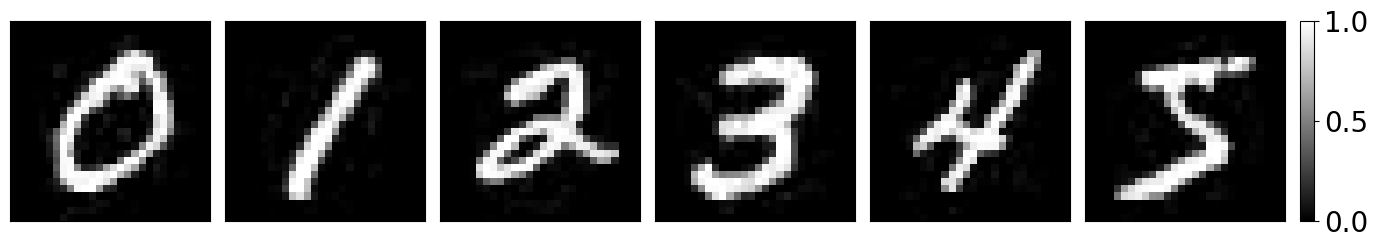

In [50]:
X_revpca = pca.inverse_transform(X_pca[first_ten_idx][:6])
plot_digits_grid(X_revpca)

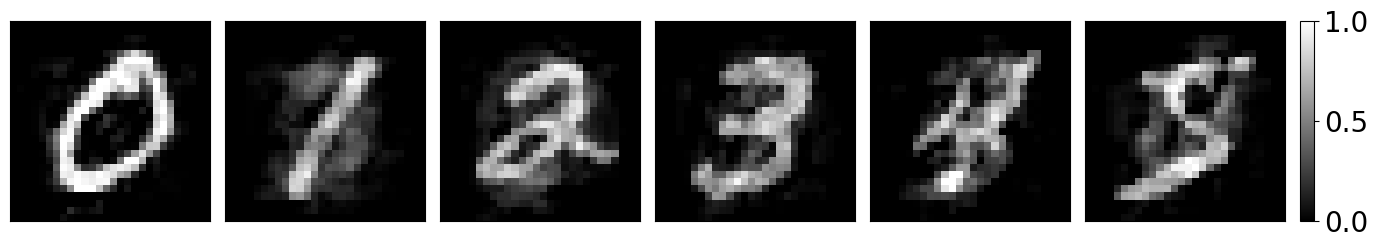

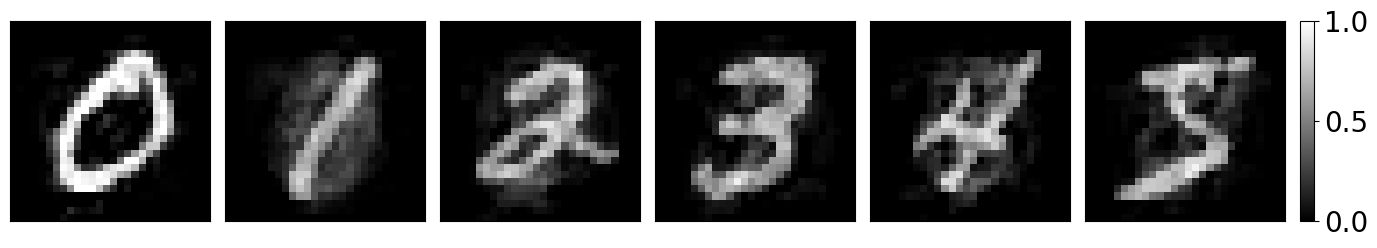

In [51]:
X_rec_pca_bp = dbp['output_rep'][-1].T
X_rec_pca_lc = dlc['output_rep'][-1].T
X_rec_lc = pca.inverse_transform(X_rec_pca_lc)
X_rec_bp = pca.inverse_transform(X_rec_pca_bp)
plot_digits_grid(X_rec_bp)
plot_digits_grid(X_rec_lc)

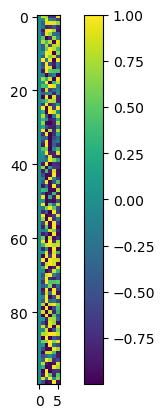

In [34]:
plt.imshow(h_seq)
plt.colorbar()
plt.show()

In [35]:
data_first2 = np.zeros((data_pca[:,:6].shape))
data_first2[:,:3] = data_pca[:,:3]
h_seq, y_hat, L = dbp['net'].forward_propagation(data_first2,np.zeros((100)))

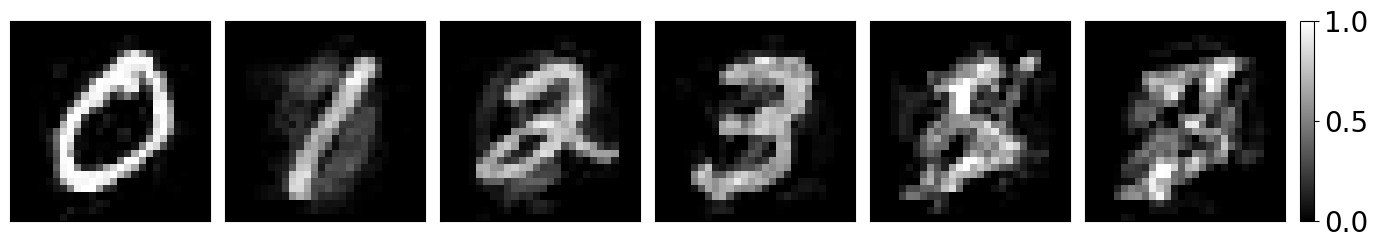

In [36]:
y_hat_ = pca.inverse_transform(y_hat.T)
plot_digits_grid(y_hat_)